In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Task 1:
Identify the average monthly temperatures for three cities of your choice and organise them as 
a two-dimensional dataset. The cities are expected to be from different climate zones. Extract 
the following statistical insights from the dataset: 
Overall mean value 
Overall standard deviation 
Mean value per city 
Standard deviation per city

In [ ]:
# Simulated average monthly temperatures for Ho Chi Minh City, Los Angeles, and Paris
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Ho Chi Minh City': [27, 28, 29, 30, 30, 29, 28, 28, 28, 28, 27, 27],  # Approximate temperatures
    'Los Angeles': [14, 15, 16, 17, 18, 20, 22, 22, 21, 19, 16, 14],  # Approximate temperatures
    'Paris': [5, 6, 9, 12, 16, 19, 21, 21, 18, 13, 9, 6]  # Approximate temperatures
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Display the DataFrame
print("Temperature Data:")
display(df)

# Calculating statistical insights
overall_mean = df.mean().mean()
overall_std = df.values.flatten().std()  # Corrected standard deviation calculation
mean_per_city = df.mean()
std_per_city = df.std()

print("\nStatistical Insights:")
print(f"Overall Mean Temperature: {overall_mean:.2f}°C")
print(f"Overall Standard Deviation: {overall_std:.2f}°C")
print(f"Mean Temperature per City:\n{mean_per_city}")
print(f"Standard Deviation per City:\n{std_per_city}")


Temperature Data:


,Ho Chi Minh City,Los Angeles,Paris
Month,,,
January,27,14,5
February,28,15,6
March,29,16,9
April,30,17,12
May,30,18,16
June,29,20,19
July,28,22,21
August,28,22,21
September,28,21,18



Statistical Insights:
Overall Mean Temperature: 19.67°C
Overall Standard Deviation: 7.40°C
Mean Temperature per City:
Ho Chi Minh City    28.250000
Los Angeles         17.833333
Paris               12.916667
dtype: float64
Standard Deviation per City:
Ho Chi Minh City    1.055290
Los Angeles         2.949063
Paris               5.976596
dtype: float64


Task 2: 
Represent the dataset from Task 1 as a heat map. Provide a colour scale for guidance. Allow 
the user to specify a threshold value. Based on this threshold value, use different base colours 
to represent the average monthly temperatures. 

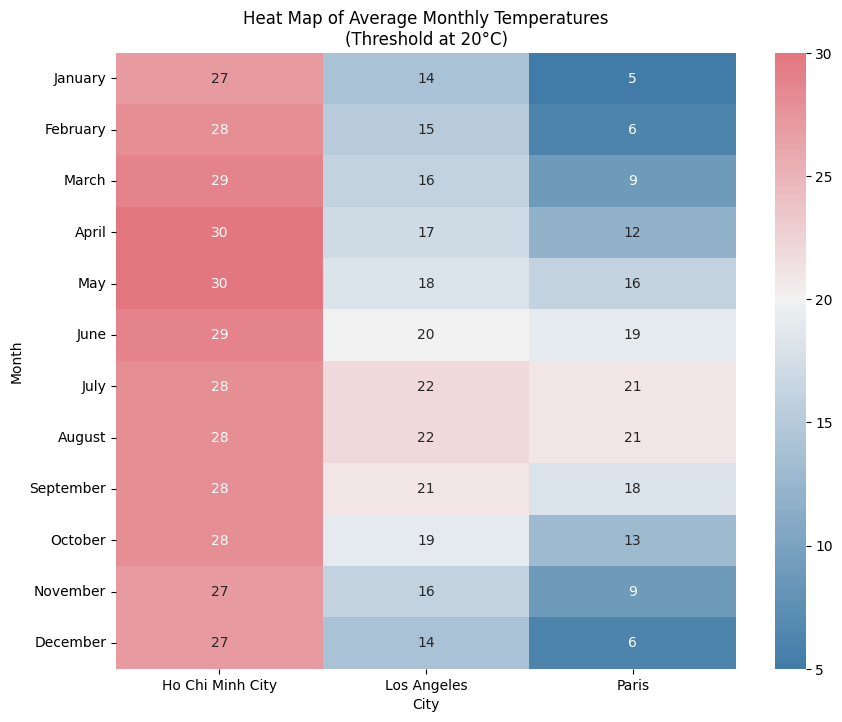

In [6]:


# Simulated average monthly temperatures for Ho Chi Minh City, Los Angeles, and Paris
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Ho Chi Minh City': [27, 28, 29, 30, 30, 29, 28, 28, 28, 28, 27, 27],
    'Los Angeles': [14, 15, 16, 17, 18, 20, 22, 22, 21, 19, 16, 14],
    'Paris': [5, 6, 9, 12, 16, 19, 21, 21, 18, 13, 9, 6]
}

df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

# Function to create a heat map with a threshold for color change
def create_heat_map(threshold):
    # Define the color map
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)  # A blue-red diverging color palette

    # Create the heat map
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(df, annot=True, fmt="d", cmap=cmap, center=threshold)
    plt.title(f'Heat Map of Average Monthly Temperatures\n(Threshold at {threshold}°C)')
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)  # Ensure the month labels are horizontal
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)  # Ensure the city labels are horizontal
    plt.xlabel("City")
    plt.ylabel("Month")
    plt.show()

# Example usage
create_heat_map(20)  # User can change this threshold value as needed


Task 3: 
Represent the dataset from Task 1 by using parallel coordinates. Use different colours for each 
city's average monthly temperatures. Add appropriate labels to the chart.

In [7]:


# Simulated average monthly temperatures for Ho Chi Minh City, Los Angeles, and Paris
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Ho Chi Minh City': [27, 28, 29, 30, 30, 29, 28, 28, 28, 28, 27, 27],
    'Los Angeles': [14, 15, 16, 17, 18, 20, 22, 22, 21, 19, 16, 14],
    'Paris': [5, 6, 9, 12, 16, 19, 21, 21, 18, 13, 9, 6]
}

# Convert data into a suitable format for parallel_coordinates
df = pd.DataFrame(data)
df = df.melt(id_vars=['Month'], var_name='City', value_name='Temperature')

# Assign numeric codes for each city for coloring
city_color = {'Ho Chi Minh City': 1, 'Los Angeles': 2, 'Paris': 3}
df['City Color'] = df['City'].map(city_color)

# Create the parallel coordinates plot
fig = px.parallel_coordinates(df, color='City Color',
                              dimensions=['Month', 'Temperature'],
                              labels={'City Color': 'City', 'Temperature': 'Temperature (°C)'},
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              title="Parallel Coordinates Plot for Average Monthly Temperatures")
fig.show()
